In [53]:
!pip install pandas seaborn matplotlib openpyxl scipy




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\shivh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [86]:
#Load Required Libraries
#First, we need to import the necessary libraries in Python.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency


In [55]:
#Next, we'll read the CSV file into a DataFrame
# Read the csv file
HRAnalytics = pd.read_csv("HR_Analytics.csv")


In [56]:
#We will check the column names and data types of the variables.
# Check the names of the variables in the dataset
print(HRAnalytics.columns)

# Check the datatypes of all the variables
print(HRAnalytics.dtypes)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
E

In [57]:
# Check the summary of the dataset
print(HRAnalytics.describe(include='all'))


                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Developm

In [58]:
#Next, we'll omit the missing values.
# Omit the missing values
HRAnalytics.dropna(inplace=True)


In [59]:
print(HRAnalytics.shape)

(1442, 35)


In [60]:
# Save the cleaned dataset to an Excel file
HRAnalytics.to_excel("HRAnalytics_cleaned.xlsx", index=False)


In [61]:
# Frequency distribution of categorical variables
print(HRAnalytics['Attrition'].value_counts())
print(HRAnalytics['BusinessTravel'].value_counts())
print(HRAnalytics['Department'].value_counts())
print(HRAnalytics['EducationField'].value_counts())
print(HRAnalytics['Gender'].value_counts())
print(HRAnalytics['JobRole'].value_counts())
print(HRAnalytics['MaritalStatus'].value_counts())


Attrition
No     1208
Yes     234
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        1020
Travel_Frequently     272
Non-Travel            150
Name: count, dtype: int64
Department
Research & Development    943
Sales                     436
Human Resources            63
Name: count, dtype: int64
EducationField
Life Sciences       596
Medical             455
Marketing           156
Technical Degree    129
Other                79
Human Resources      27
Name: count, dtype: int64
Gender
Male      863
Female    579
Name: count, dtype: int64
JobRole
Sales Executive              321
Research Scientist           287
Laboratory Technician        253
Manufacturing Director       143
Healthcare Representative    129
Manager                      101
Sales Representative          79
Research Director             77
Human Resources               52
Name: count, dtype: int64
MaritalStatus
Married     663
Single      457
Divorced    322
Name: count, dtype: int64


In [62]:
# Convert categorical variables to 'category' datatype
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 
                       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 
                       'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 
                       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 
                       'WorkLifeBalance']

for col in categorical_columns:
    HRAnalytics[col] = HRAnalytics[col].astype('category')


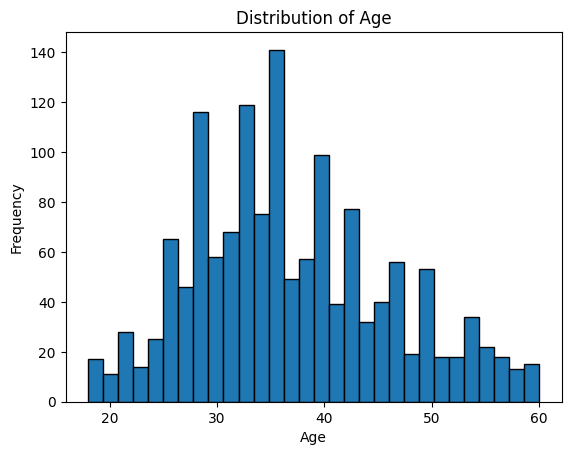

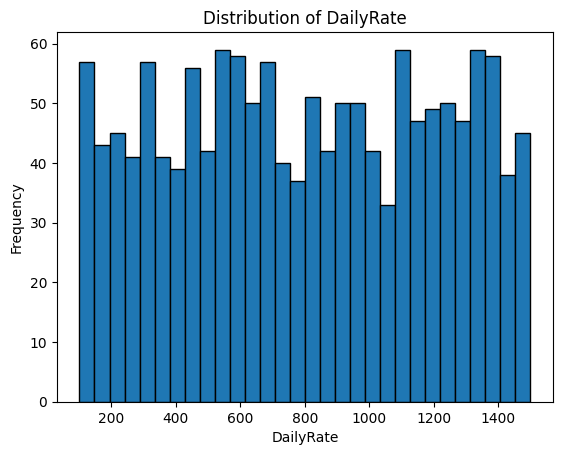

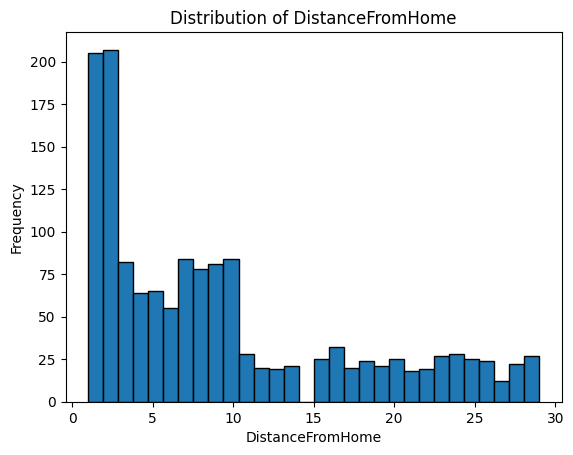

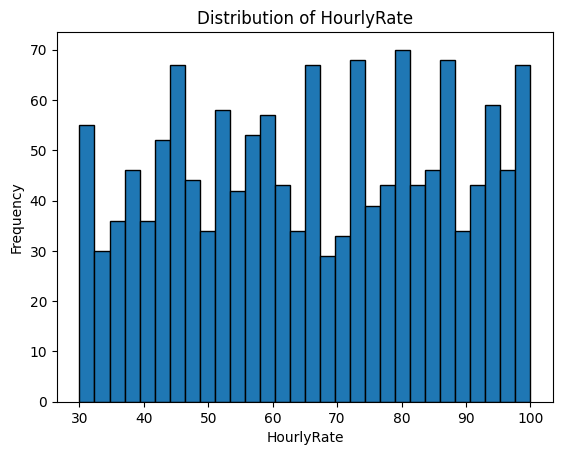

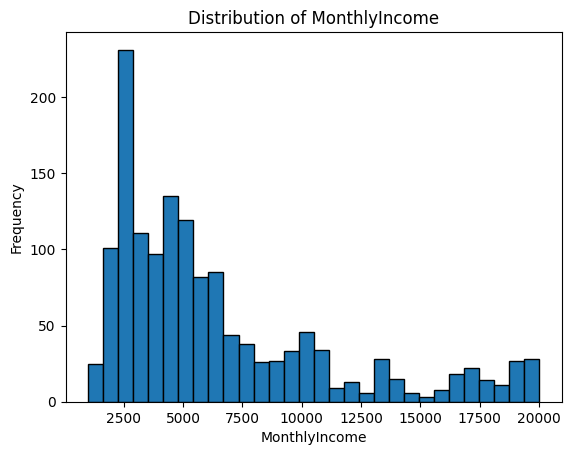

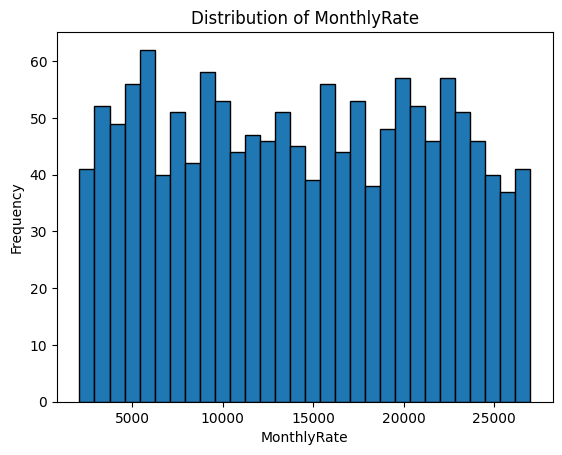

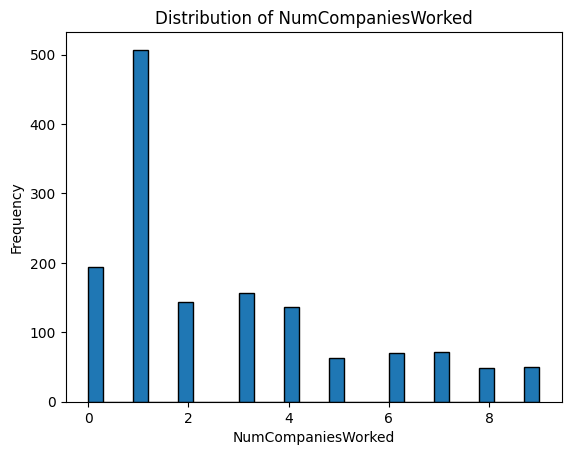

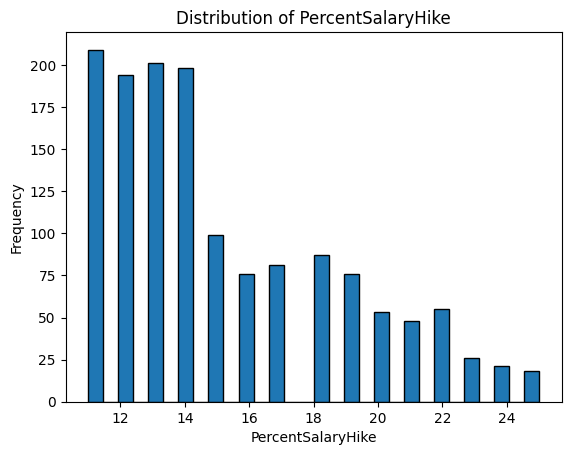

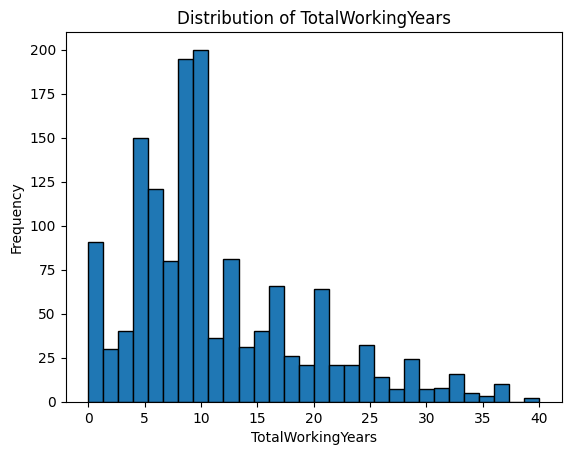

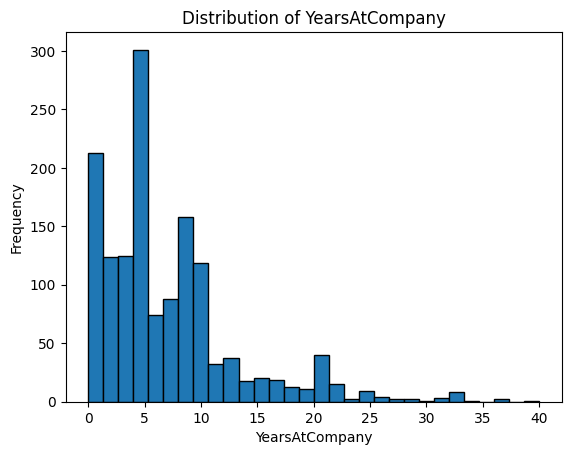

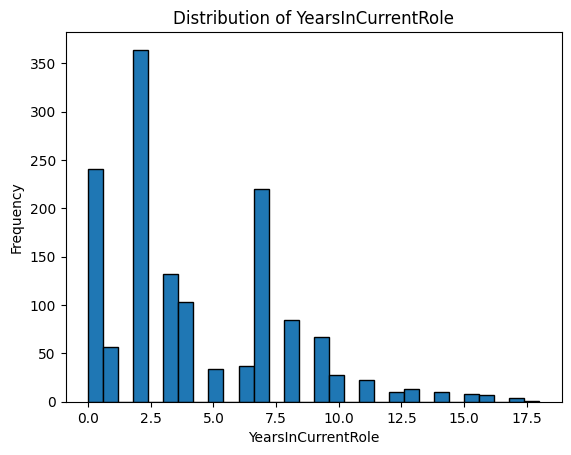

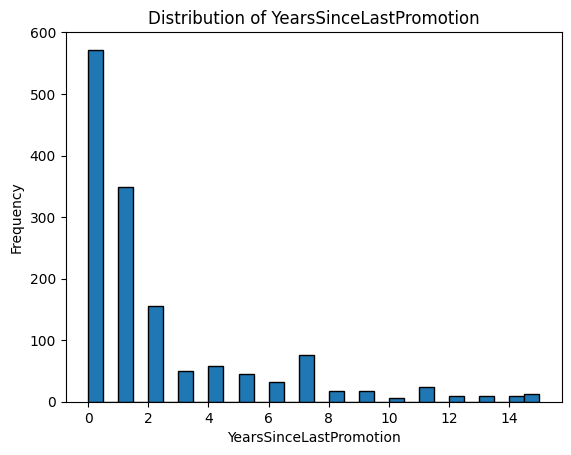

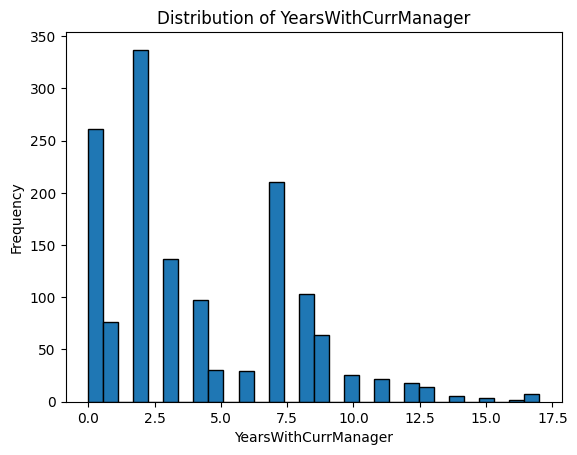

In [63]:
# Distribution of numeric variables
numeric_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                   'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
                   'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in numeric_columns:
    plt.hist(HRAnalytics[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


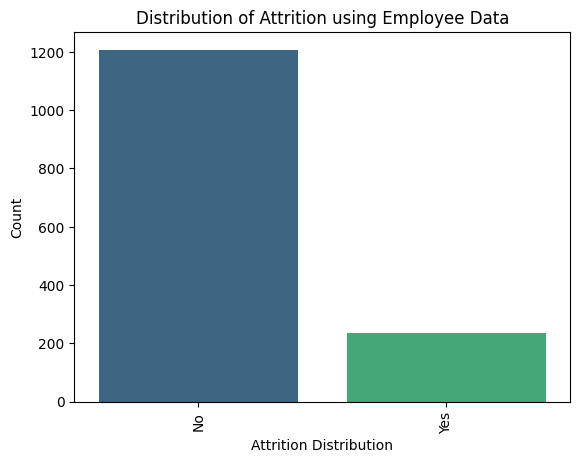

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


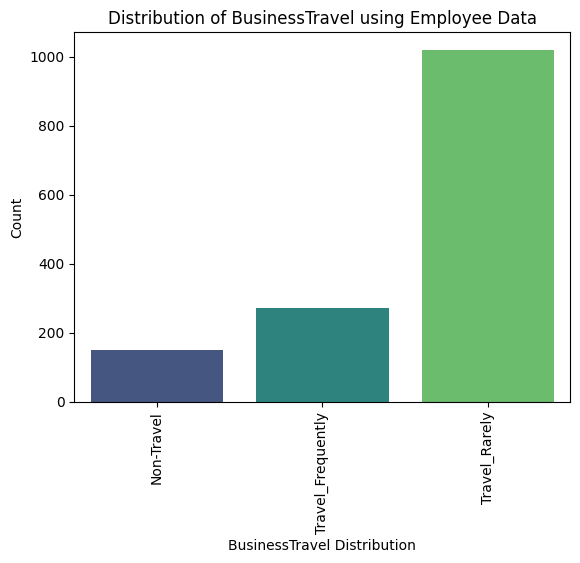

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


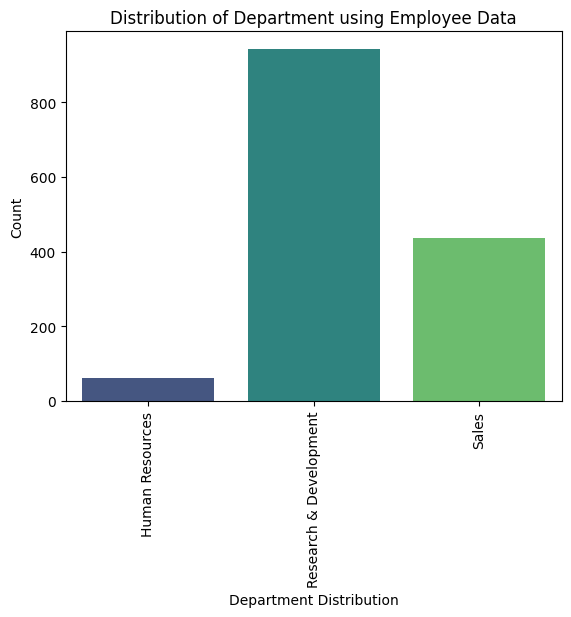

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


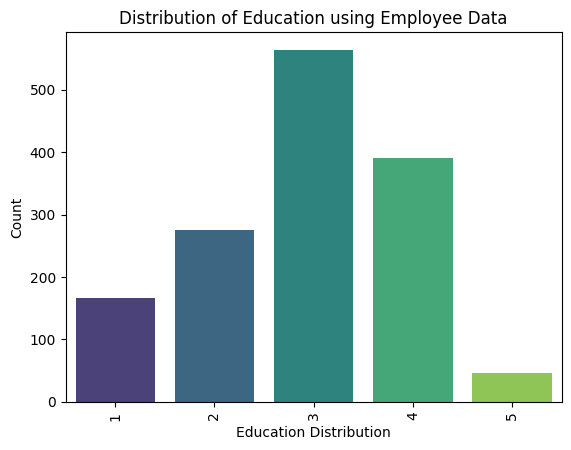

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


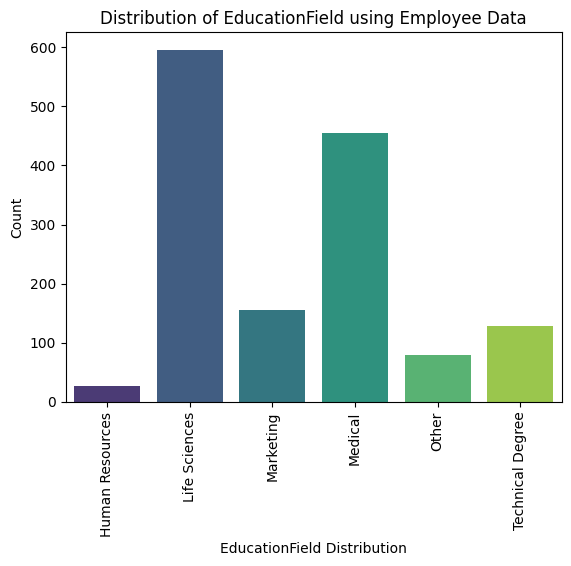

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


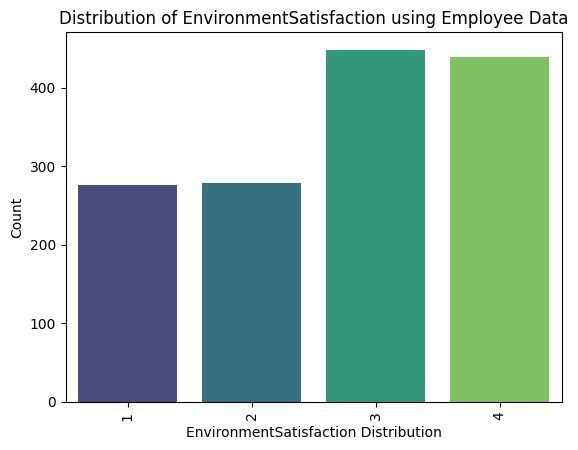

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


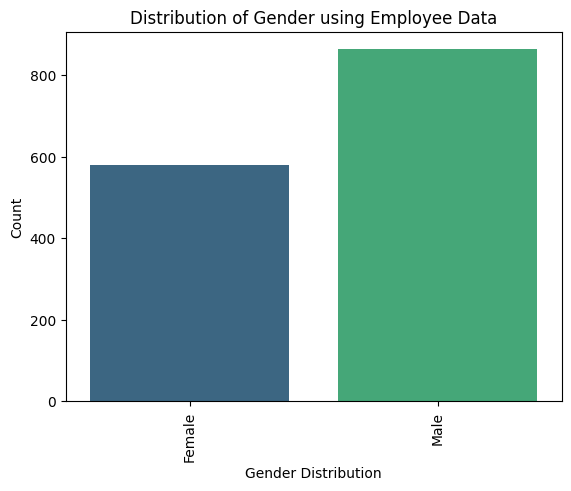

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


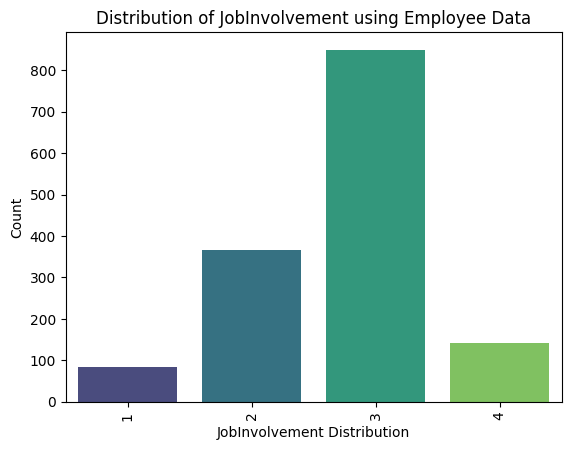

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


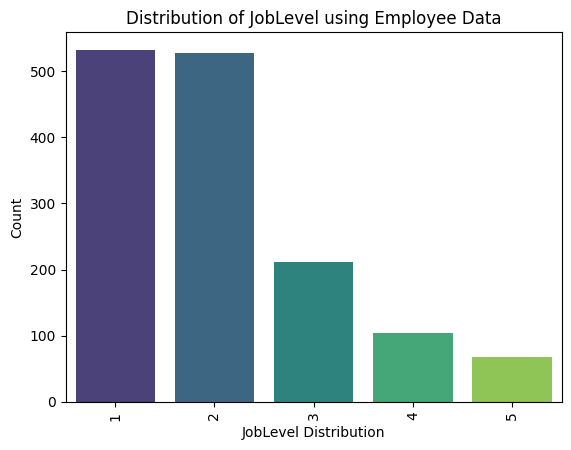

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


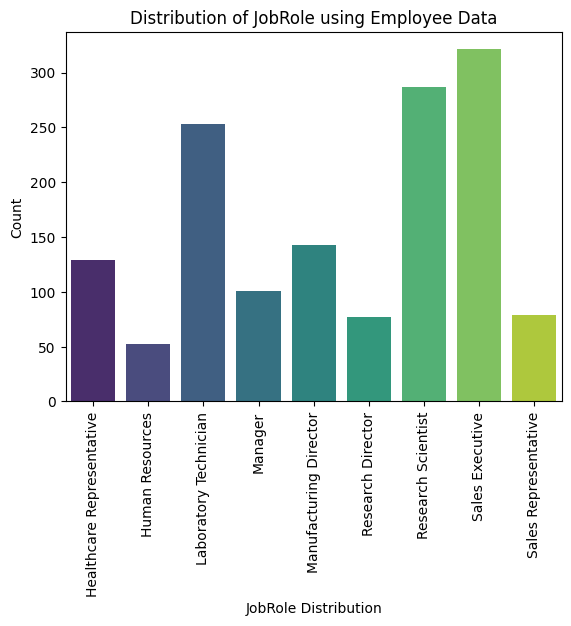

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


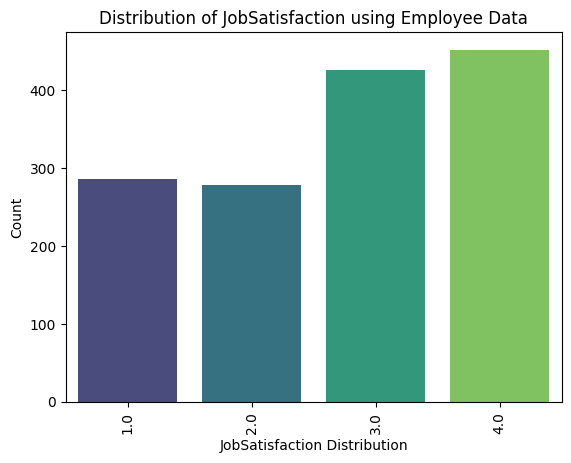

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


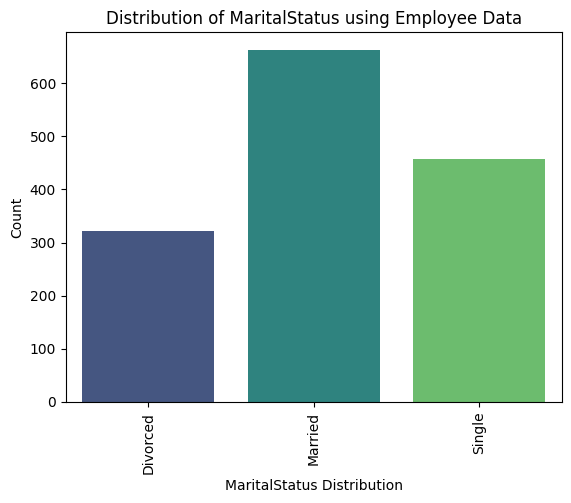

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


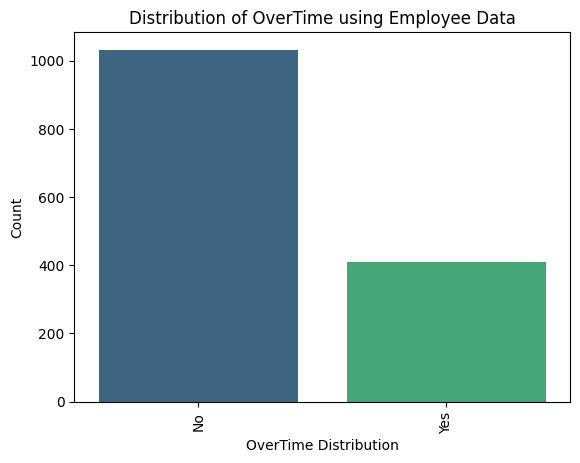

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


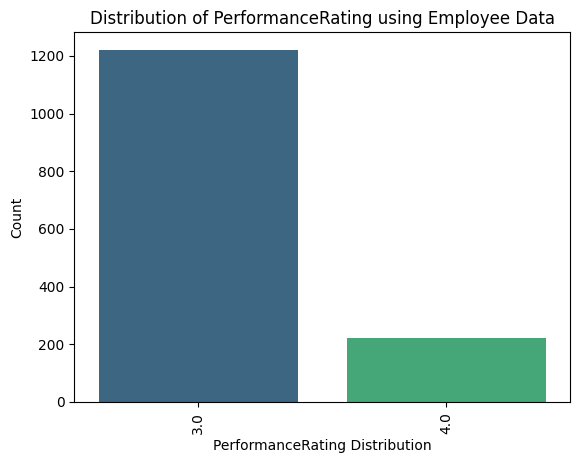

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


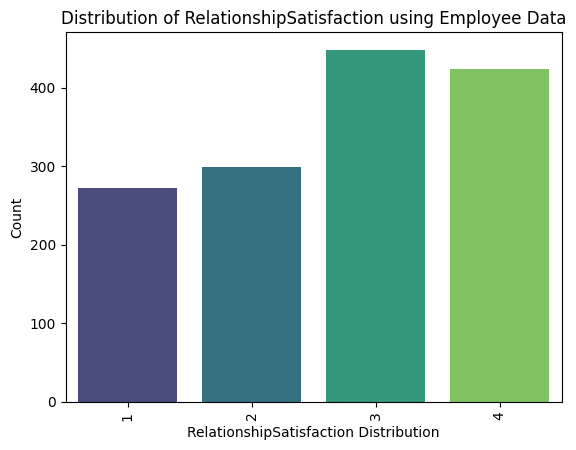

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


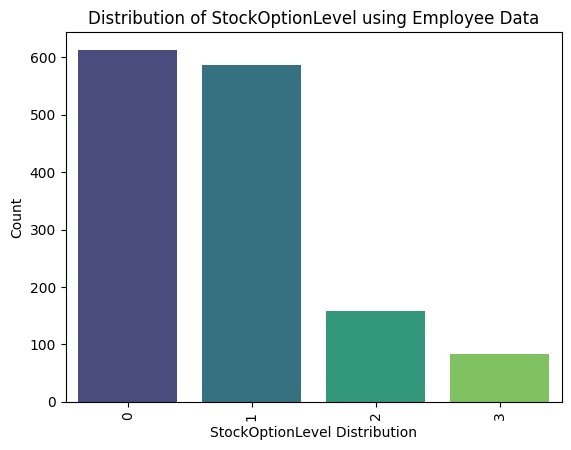

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


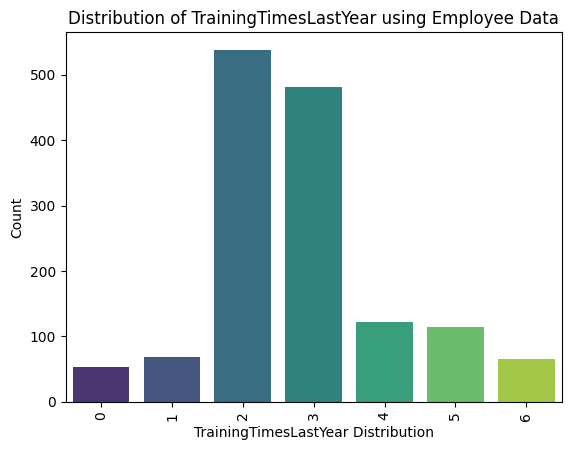

C:\Users\shivh\AppData\Local\Temp\ipykernel_7916\3979268092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=HRAnalytics, palette="viridis")


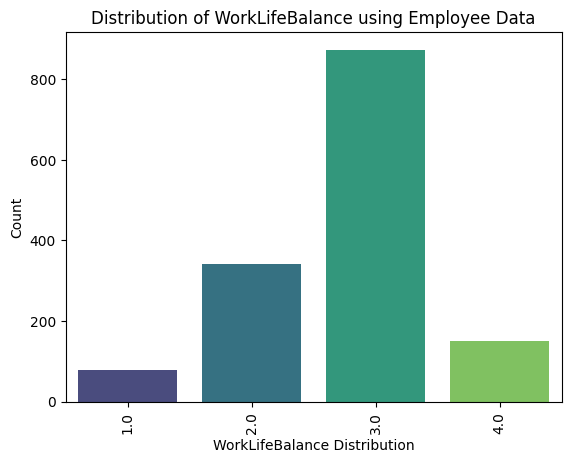

In [64]:
# Categorical Variables Distribution
for col in categorical_columns:
    sns.countplot(x=col, data=HRAnalytics, palette="viridis")
    plt.title(f'Distribution of {col} using Employee Data')
    plt.xlabel(f'{col} Distribution')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


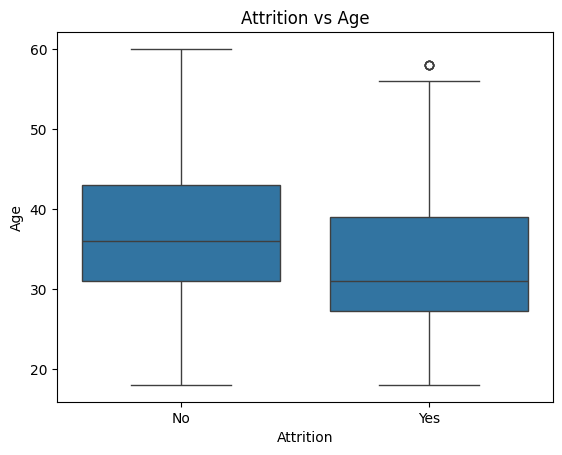

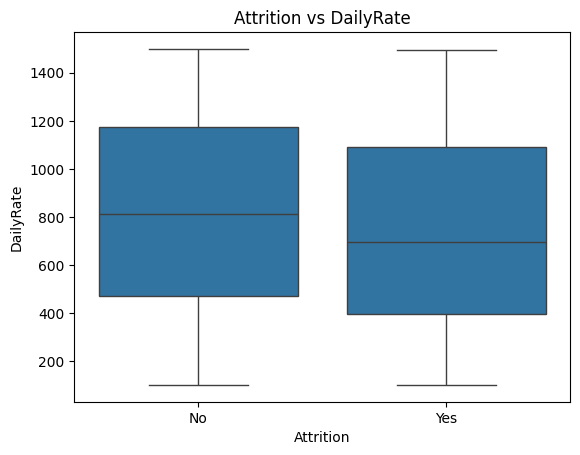

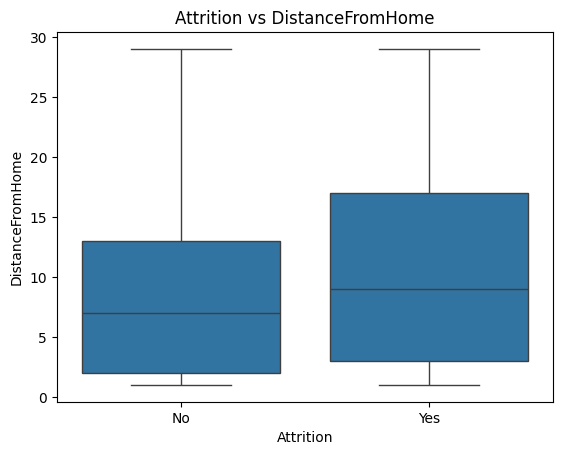

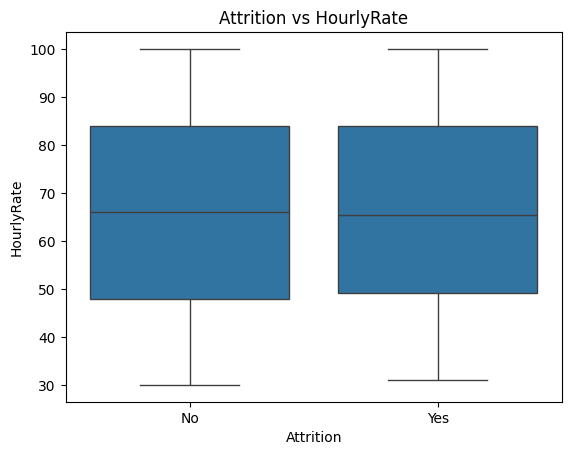

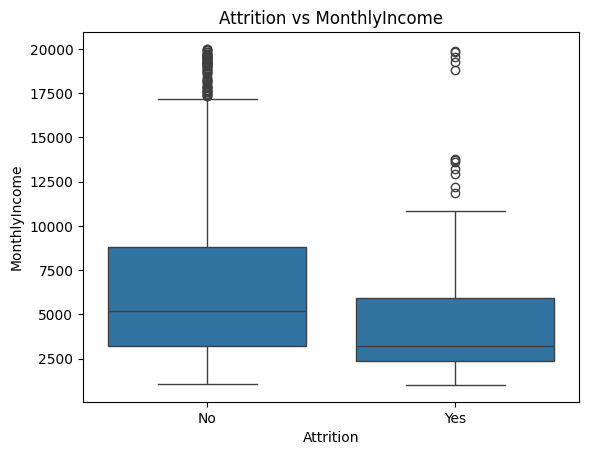

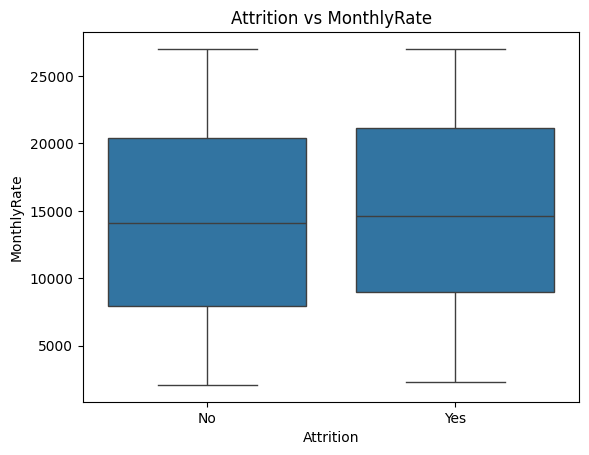

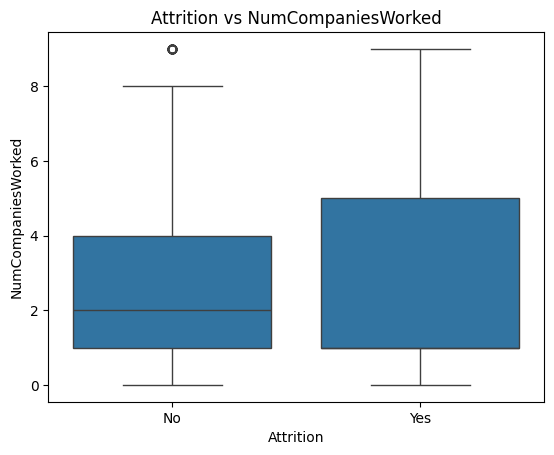

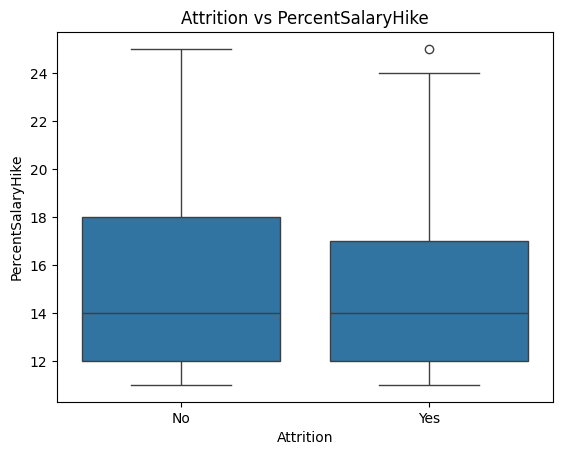

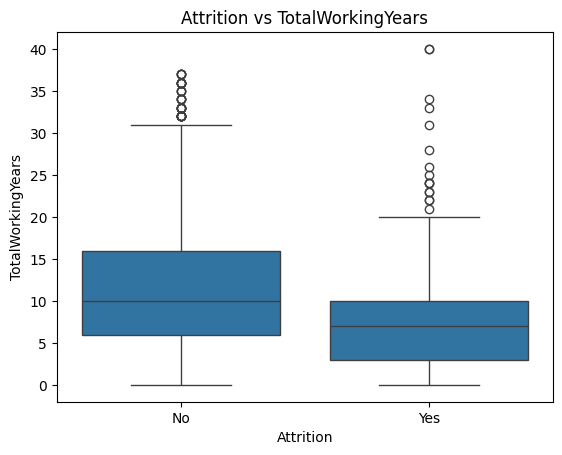

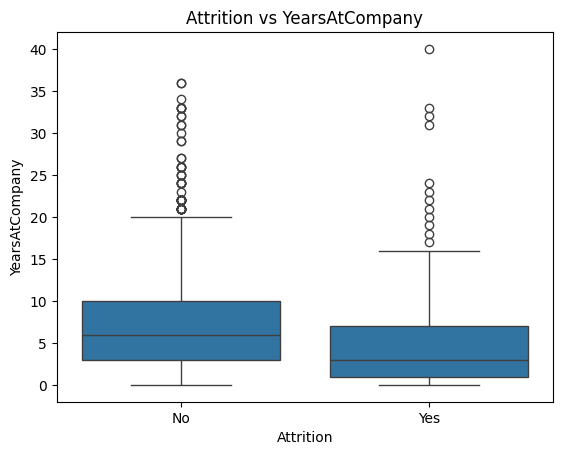

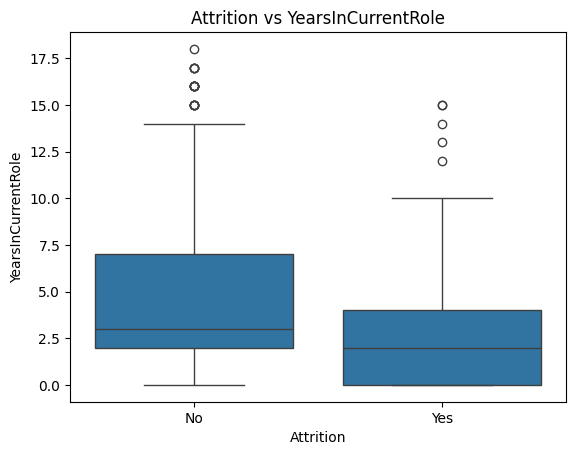

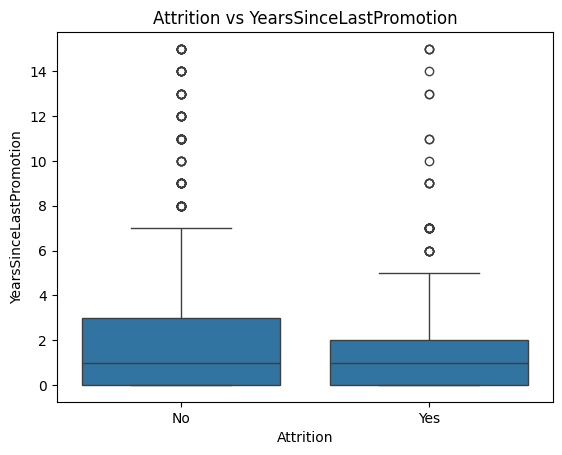

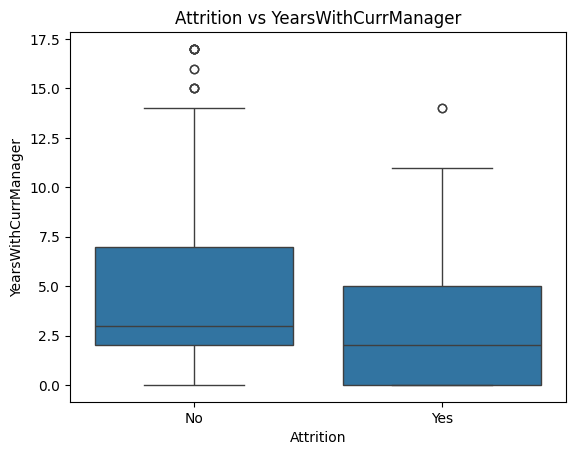

In [65]:
# Attrition vs numerical variables
for col in numeric_columns:
    sns.boxplot(x='Attrition', y=col, data=HRAnalytics)
    plt.title(f'Attrition vs {col}')
    plt.show()


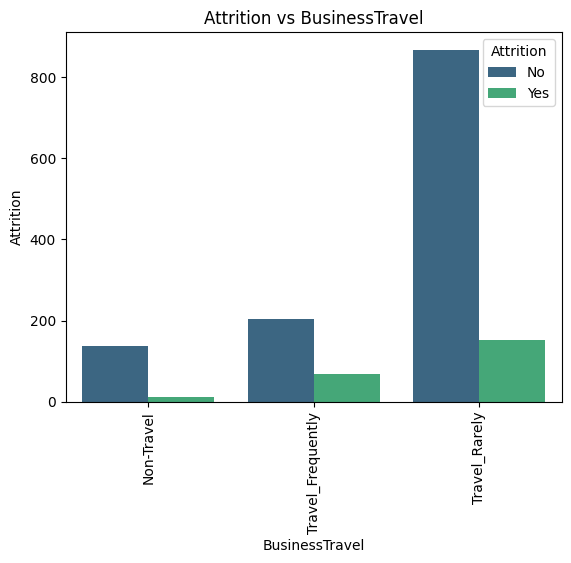

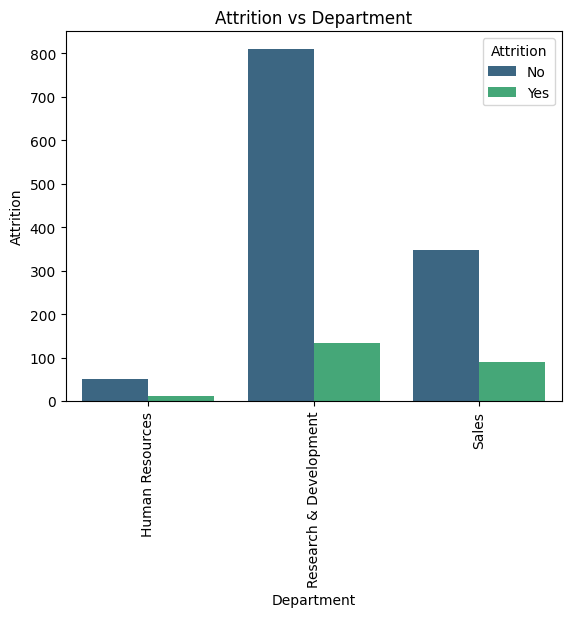

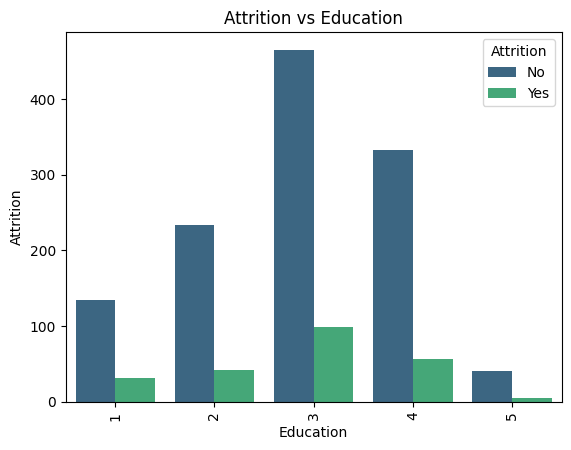

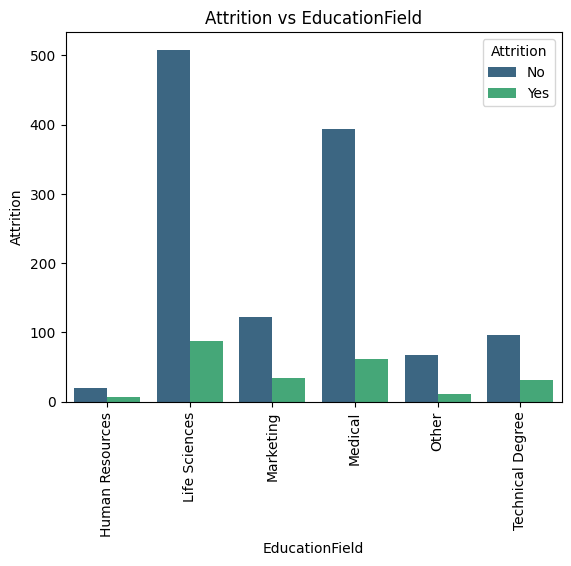

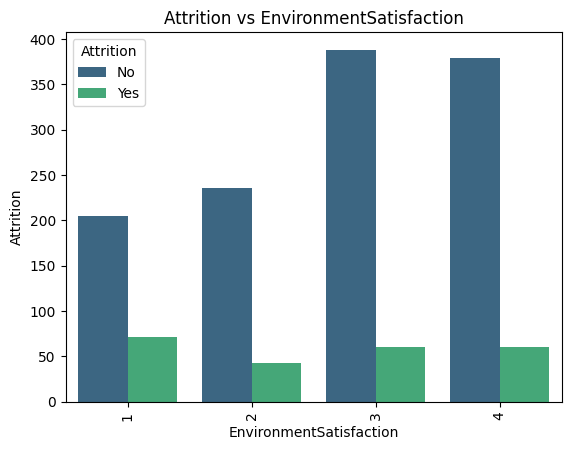

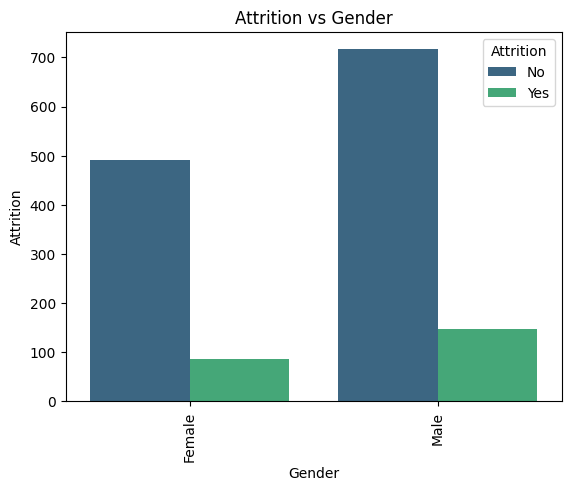

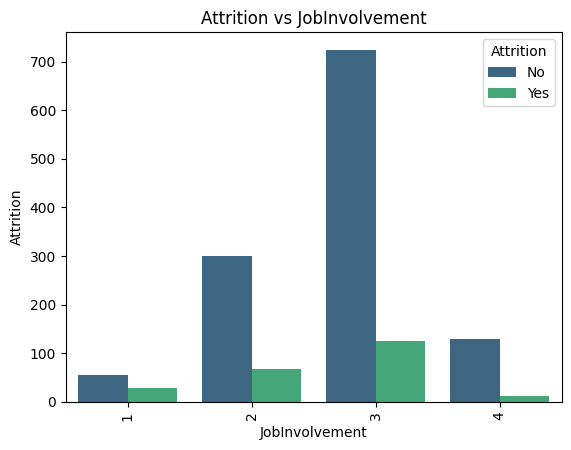

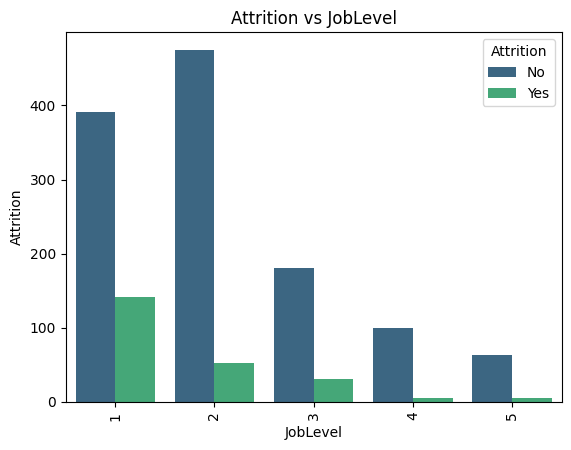

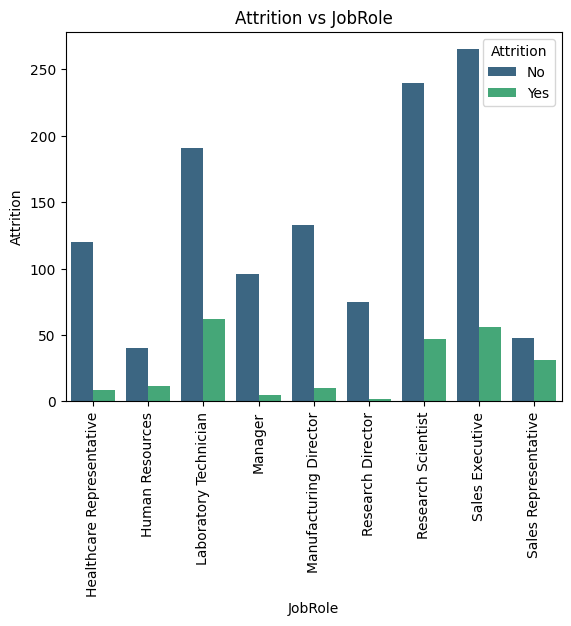

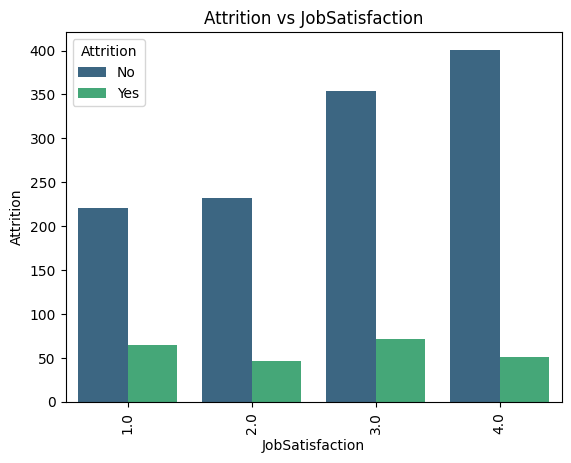

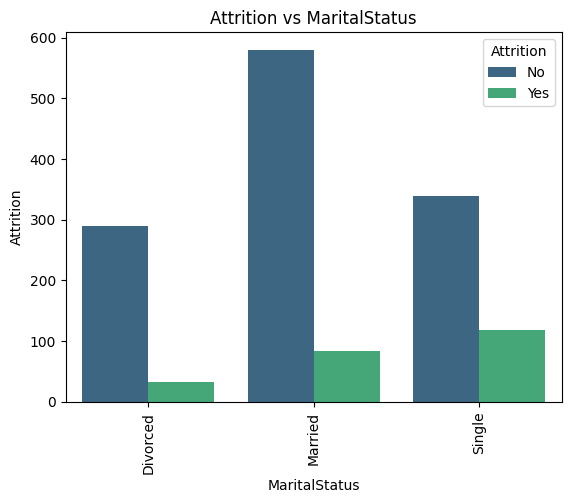

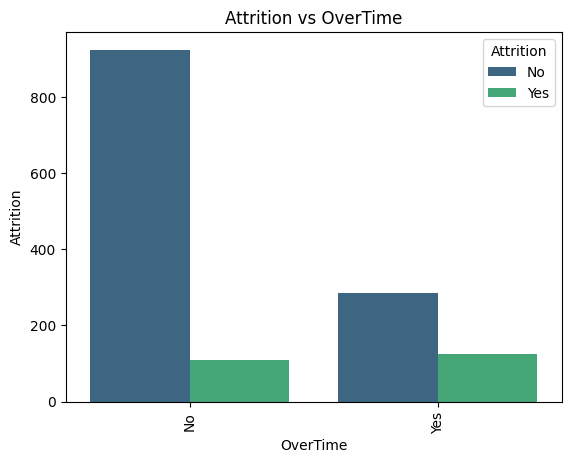

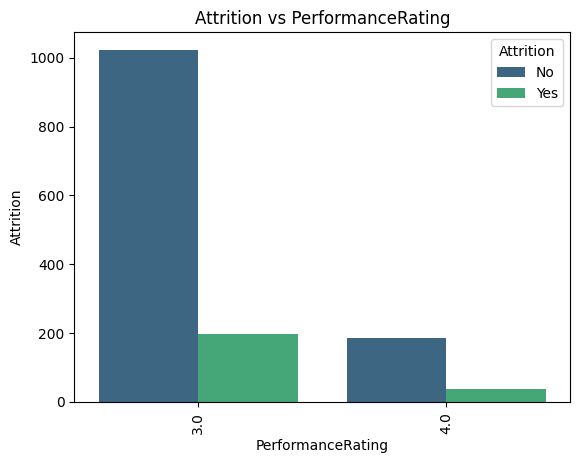

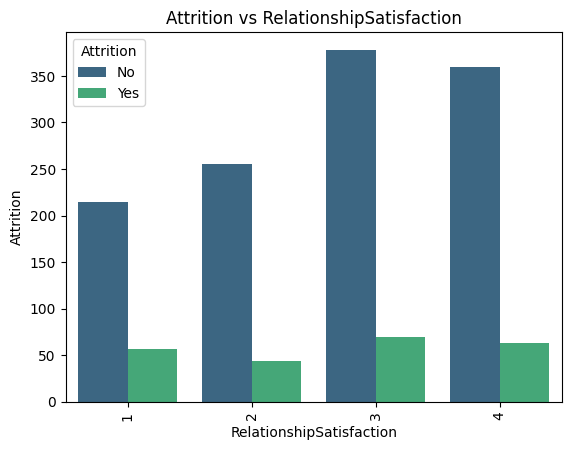

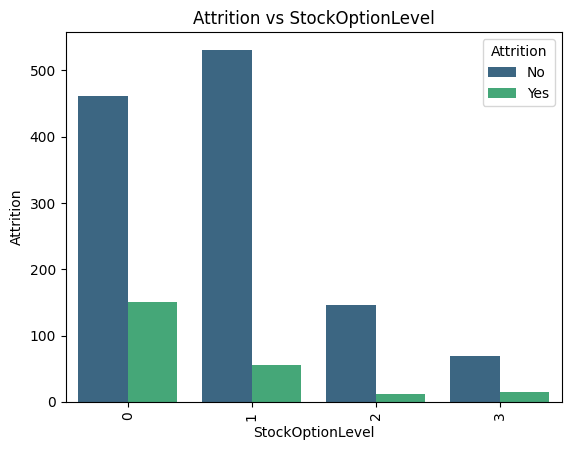

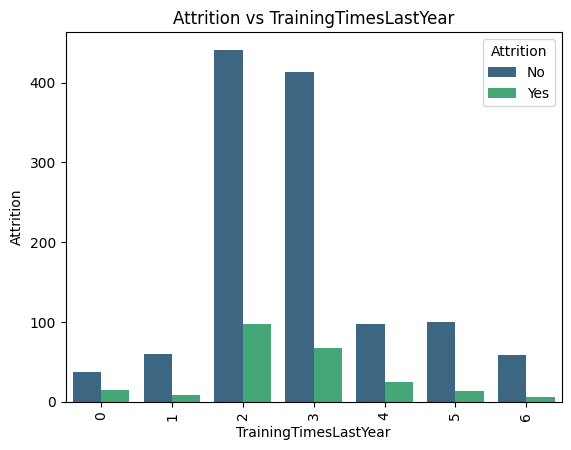

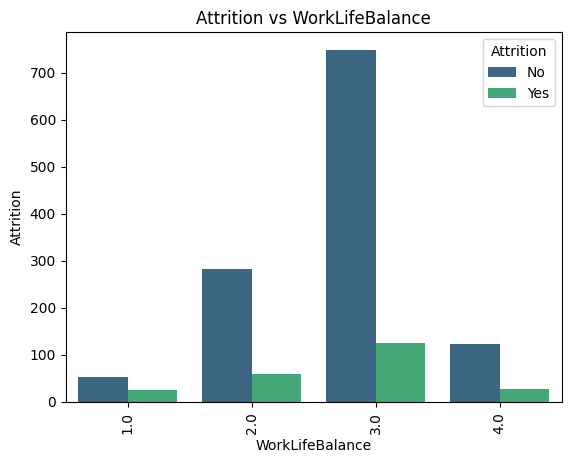

In [66]:
# Attrition vs categorical variables
for col in categorical_columns[1:]:  # Skipping 'Attrition' itself
    sns.countplot(x=col, hue='Attrition', data=HRAnalytics, palette="viridis")
    plt.title(f'Attrition vs {col}')
    plt.xlabel(col)
    plt.ylabel('Attrition')
    plt.xticks(rotation=90)
    plt.show()


In [67]:
# ANOVA Test
for col in numeric_columns:
    model = stats.f_oneway(HRAnalytics[HRAnalytics['Attrition'] == 'Yes'][col],
                           HRAnalytics[HRAnalytics['Attrition'] == 'No'][col])
    print(f'ANOVA test for {col}: F={model.statistic}, p={model.pvalue}')


ANOVA test for Age: F=40.16735791058492, p=3.111050884756975e-10
ANOVA test for DailyRate: F=4.723255671408213, p=0.029919880558436675
ANOVA test for DistanceFromHome: F=9.33124860016751, p=0.0022941444292096857
ANOVA test for HourlyRate: F=0.22899309699956572, p=0.6323440842249043
ANOVA test for MonthlyIncome: F=38.10978005704037, p=8.679175228319697e-10
ANOVA test for MonthlyRate: F=0.5722734976014132, p=0.449480643332262
ANOVA test for NumCompaniesWorked: F=2.5934701754375777, p=0.10752416952973443
ANOVA test for PercentSalaryHike: F=0.4310111637685134, p=0.5115980979178336
ANOVA test for TotalWorkingYears: F=43.204879252168055, p=6.873395774095478e-11
ANOVA test for YearsAtCompany: F=26.49265793098105, p=3.0107448002758387e-07
ANOVA test for YearsInCurrentRole: F=38.72266437052034, p=6.391996308081605e-10
ANOVA test for YearsSinceLastPromotion: F=1.4888228345139902, p=0.2225989764090996
ANOVA test for YearsWithCurrManager: F=36.24370251507185, p=2.205980684426362e-09


In [68]:
# Chi-Square Test
for col in categorical_columns[1:]:  # Skipping 'Attrition' itself
    contingency_table = pd.crosstab(HRAnalytics['Attrition'], HRAnalytics[col])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f'Chi-Square test for {col}: chi2={chi2}, p={p}')


Chi-Square test for BusinessTravel: chi2=25.315404286905796, p=3.1829499197449252e-06
Chi-Square test for Department: chi2=9.11496910624168, p=0.010488408823913938
Chi-Square test for Education: chi2=3.384596062006086, p=0.4956412424558785
Chi-Square test for EducationField: chi2=15.919198465752281, p=0.007078592488421422
Chi-Square test for EnvironmentSatisfaction: chi2=23.213223814430343, p=3.645417887939473e-05
Chi-Square test for Gender: chi2=0.8850865935983768, p=0.34681227687770555
Chi-Square test for JobInvolvement: chi2=26.914507499094835, p=6.1353907168557425e-06
Chi-Square test for JobLevel: chi2=71.29168855330461, p=1.21124294266631e-14
Chi-Square test for JobRole: chi2=82.74303539109668, p=1.368943301066435e-14
Chi-Square test for JobSatisfaction: chi2=17.179559087521042, p=0.0006491167884499545
Chi-Square test for MaritalStatus: chi2=46.112803320842346, p=9.699112267563305e-11
Chi-Square test for OverTime: chi2=87.1712929987693, p=9.951782327091775e-21
Chi-Square test for 

In [69]:
# Selecting subset of data
HRdata = HRAnalytics[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                      'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
                      'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
print(HRdata.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1442 non-null   int64  
 1   DailyRate                1442 non-null   int64  
 2   DistanceFromHome         1442 non-null   int64  
 3   HourlyRate               1442 non-null   int64  
 4   MonthlyIncome            1442 non-null   int64  
 5   MonthlyRate              1442 non-null   int64  
 6   NumCompaniesWorked       1442 non-null   int64  
 7   PercentSalaryHike        1442 non-null   int64  
 8   TotalWorkingYears        1442 non-null   int64  
 9   YearsAtCompany           1442 non-null   int64  
 10  YearsInCurrentRole       1442 non-null   int64  
 11  YearsSinceLastPromotion  1442 non-null   int64  
 12  YearsWithCurrManager     1442 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 157.7 KB
None


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Encode categorical variables
HRAnalytics_encoded = pd.get_dummies(HRAnalytics, drop_first=True)

# Print out the column names to check the encoded columns
print(HRAnalytics_encoded.columns)


Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
       'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales', 'Education_2',
       'Education_3', 'Education_4', 'Education_5',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_2',
       'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4', 'Gender_Male',
       'JobInvolvement_2', 'JobInvolvement_3', 'JobInvolvement_4',
       'JobLevel_2', 'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobRole_Human Resources', 'JobRole_L

In [71]:
# Define features (X) and target (y)
X = HRAnalytics_encoded[['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears',
                         'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
                         'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
                         'Department_Research & Development', 'Department_Sales',
                         'Education_2', 'Education_3', 'Education_4', 'Education_5',
                         'EducationField_Life Sciences', 'EducationField_Marketing',
                         'EducationField_Medical', 'EducationField_Other',
                         'EducationField_Technical Degree', 'EnvironmentSatisfaction_2',
                         'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4',
                         'Gender_Male', 'JobInvolvement_2', 'JobInvolvement_3', 'JobInvolvement_4',
                         'JobLevel_2', 'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
                         'JobRole_Human Resources', 'JobRole_Laboratory Technician',
                         'JobRole_Manager', 'JobRole_Manufacturing Director',
                         'JobRole_Research Director', 'JobRole_Research Scientist',
                         'JobRole_Sales Executive', 'JobRole_Sales Representative',
                         'JobSatisfaction_2.0', 'JobSatisfaction_3.0', 'JobSatisfaction_4.0',
                         'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
                         'StockOptionLevel_1', 'StockOptionLevel_2', 'StockOptionLevel_3',
                         'TrainingTimesLastYear_1', 'TrainingTimesLastYear_2', 'TrainingTimesLastYear_3',
                         'TrainingTimesLastYear_4', 'TrainingTimesLastYear_5', 'TrainingTimesLastYear_6',
                         'WorkLifeBalance_2.0', 'WorkLifeBalance_3.0', 'WorkLifeBalance_4.0']]

y = HRAnalytics_encoded['Attrition_Yes']


In [72]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [73]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [74]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))


Logistic Regression
[[347  13]
 [ 40  33]]
              precision    recall  f1-score   support

       False       0.90      0.96      0.93       360
        True       0.72      0.45      0.55        73

    accuracy                           0.88       433
   macro avg       0.81      0.71      0.74       433
weighted avg       0.87      0.88      0.87       433

Accuracy: 0.8775981524249422


In [75]:
# Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree Classifier")
print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))


Decision Tree Classifier
[[322  38]
 [ 56  17]]
              precision    recall  f1-score   support

       False       0.85      0.89      0.87       360
        True       0.31      0.23      0.27        73

    accuracy                           0.78       433
   macro avg       0.58      0.56      0.57       433
weighted avg       0.76      0.78      0.77       433

Accuracy: 0.7829099307159353


In [76]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classifier
[[356   4]
 [ 60  13]]
              precision    recall  f1-score   support

       False       0.86      0.99      0.92       360
        True       0.76      0.18      0.29        73

    accuracy                           0.85       433
   macro avg       0.81      0.58      0.60       433
weighted avg       0.84      0.85      0.81       433

Accuracy: 0.8521939953810623


In [77]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("Support Vector Classifier")
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))


Support Vector Classifier
[[358   2]
 [ 62  11]]
              precision    recall  f1-score   support

       False       0.85      0.99      0.92       360
        True       0.85      0.15      0.26        73

    accuracy                           0.85       433
   macro avg       0.85      0.57      0.59       433
weighted avg       0.85      0.85      0.81       433

Accuracy: 0.8521939953810623


In [78]:
# EDA Summary
eda_summary = """
1. Descriptive Statistics and Initial Inspection:
   - Inspected data structure, summary statistics, and missing values.

2. ANOVA Tests:
   - Conducted on numeric variables to determine their significance:
     - Age, DailyRate, DistanceFromHome, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, etc.

3. Chi-Square Tests:
   - Conducted on categorical variables to determine their significance:
     - BusinessTravel, Department, Education, EducationField, EnvironmentSatisfaction, Gender, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, OverTime, etc.

4. Data Cleaning:
   - Handled missing values and checked for duplicates.

5. Feature Encoding:
   - Converted categorical variables into dummy variables using pd.get_dummies().
"""

# Data for the summary table
data = {
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support Vector Classifier'],
    'Accuracy': [0.8776, 0.7691, 0.8499, 0.8522],
    'Precision (False)': [0.90, 0.85, 0.85, 0.85],
    'Recall (False)': [0.96, 0.88, 0.99, 0.99],
    'F1-Score (False)': [0.93, 0.86, 0.92, 0.92],
    'Precision (True)': [0.72, 0.29, 0.79, 0.85],
    'Recall (True)': [0.45, 0.25, 0.15, 0.15],
    'F1-Score (True)': [0.55, 0.26, 0.25, 0.26]
}

# Create the DataFrame
summary_df = pd.DataFrame(data)

# Display the EDA summary
print("\nExploratory Data Analysis (EDA) Summary:")
print(eda_summary)

# Display the summary table for model performance
print("Model Performance Summary:")
print(summary_df)




Exploratory Data Analysis (EDA) Summary:

1. Descriptive Statistics and Initial Inspection:
   - Inspected data structure, summary statistics, and missing values.

2. ANOVA Tests:
   - Conducted on numeric variables to determine their significance:
     - Age, DailyRate, DistanceFromHome, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, etc.

3. Chi-Square Tests:
   - Conducted on categorical variables to determine their significance:
     - BusinessTravel, Department, Education, EducationField, EnvironmentSatisfaction, Gender, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, OverTime, etc.

4. Data Cleaning:
   - Handled missing values and checked for duplicates.

5. Feature Encoding:
   - Converted categorical variables into dummy variables using pd.get_dummies().

Model Performance Summary:
                       Model  Accuracy  Precision (False)  Recall (False)  \
0        Logistic Regression    0.8776               0.9

In [84]:
# Example: Adding interaction term between 'Age' and 'TotalWorkingYears'
HRAnalytics['Age_WorkExperience'] = HRAnalytics['Age'] * HRAnalytics['TotalWorkingYears']
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=5)  # Reduce to 5 principal components
X_pca = pca.fit_transform(X)

# Print explained variance ratio to understand the amount of variance captured
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")


Explained variance ratio by PCA components: [9.92673351e-01 7.31724279e-03 3.33756010e-06 2.94553909e-06
 1.93073315e-06]


In [80]:
# Advanced Preprocessing
from sklearn.impute import SimpleImputer

# Impute missing values using the median strategy
imputer = SimpleImputer(strategy='median')
HRAnalytics[numeric_columns] = imputer.fit_transform(HRAnalytics[numeric_columns])
from sklearn.ensemble import IsolationForest

# Detecting outliers
iso = IsolationForest(contamination=0.01)  # Assuming 1% of data are outliers
outliers = iso.fit_predict(HRAnalytics[numeric_columns])
HRAnalytics = HRAnalytics[outliers == 1]  # Keep only inliers


In [81]:
#Model Tuning and Optimization
from sklearn.model_selection import GridSearchCV

# Example for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
from sklearn.model_selection import cross_val_score

# Cross-validation for RandomForestClassifier
rf = RandomForestClassifier()
scores = cross_val_score(rf, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Cross-Validation Scores: [0.84429066 0.8615917  0.86458333 0.85416667 0.85763889]


In [82]:
!pip install xgboost



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\shivh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [83]:
#Ensemble Methods
from xgboost import XGBClassifier

# Fit an XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classifier")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('logreg', LogisticRegression()),
    ('rf', RandomForestClassifier())
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
print("Stacking Classifier")
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))


XGBoost Classifier
[[351   9]
 [ 53  20]]
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       360
        True       0.69      0.27      0.39        73

    accuracy                           0.86       433
   macro avg       0.78      0.62      0.66       433
weighted avg       0.84      0.86      0.83       433

Stacking Classifier
[[352   8]
 [ 50  23]]
              precision    recall  f1-score   support

       False       0.88      0.98      0.92       360
        True       0.74      0.32      0.44        73

    accuracy                           0.87       433
   macro avg       0.81      0.65      0.68       433
weighted avg       0.85      0.87      0.84       433

